In [2]:
#setup
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans

import spectral

from itertools import cycle
import matplotlib.colors as colors

In [3]:
def show_results(model):
    Y = model.labels_.reshape(data.shape[:-1])
    no_labels = np.unique(Y).size

    table_w = 3
    table_h = (no_labels + table_w - 1) // table_w
    fig, axes = plt.subplots(table_h, table_w, figsize=(15, 15))
    
    for i in range(no_labels):
        h, w = i//table_w, i%table_w
        
        yi = Y*0
        mask = Y==i
        yi[mask] = 1
        
        if table_h == 1:
            ax = axes[w]
        else:
            ax = axes[h][w]
            
        ax.set_title(f'Group {i}')
        ax.imshow(yi, cmap='gist_earth')
    
    plt.figure(figsize=(15, 10))
    plt.title('All groups')
    plt.imshow(Y, cmap='gist_earth')

## Zadanie 3. 
W pliku APEX_OSD_V1_calibr_cube znajduje się wielospektralne zdjęcie satelitarne. Zdjęcie ma rozmiar 1500 x 1000 pikseli, każdy piksel jest opisany przez 285 wartości. Pogrupuj piksele tego zdjęcia używając poznanych algorytmów grupowania danych. Sprawdź różne algorytmy i różne ich parametry, uzyskane grupowania oceń stosując wybrane wskaźniki poprawności. Wyniki przedstaw w formie mapy terenu. Zastanów się, która z uzyskanych map jest najlepsza.

http://apex.vgt.vito.be/content/free-data-cubes

In [16]:
img = spectral.open_image('APEX_OSD_V1_calibr_cube.hdr')
data = img.load()
X = data.reshape(-1, data.shape[-1])

### MiniBatchKMeans with n_clusters=6

In [11]:
%%time
mbkmeans6 = MiniBatchKMeans(n_clusters=6)
mbkmeans6.fit(X)

CPU times: user 7.39 s, sys: 581 ms, total: 7.97 s
Wall time: 7.9 s


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=6, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

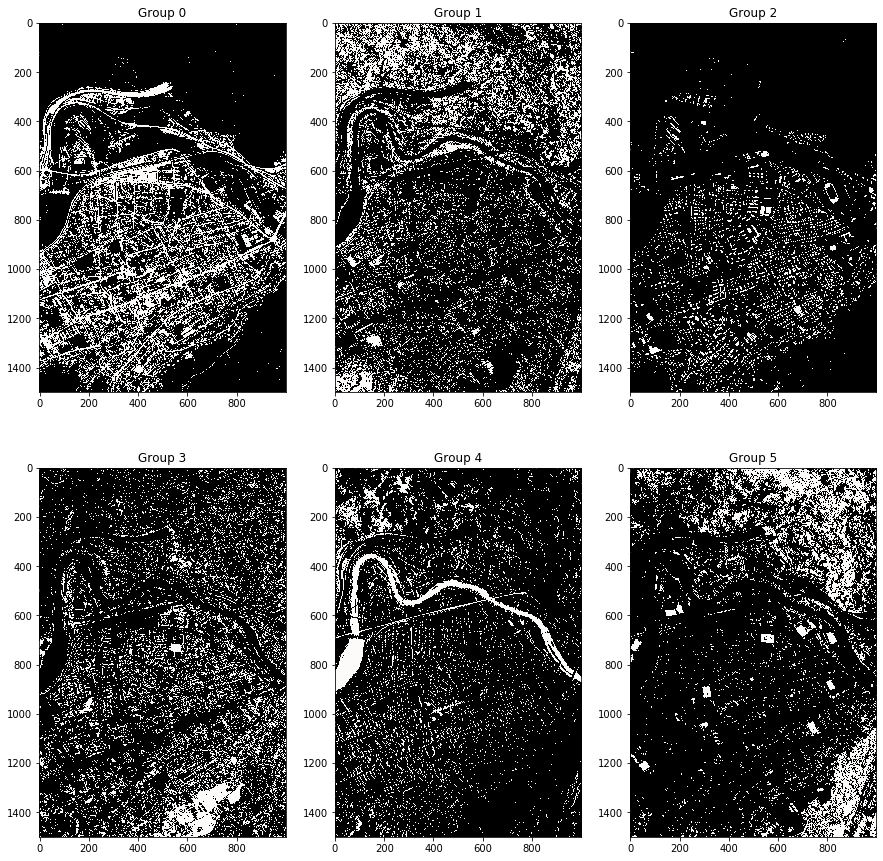

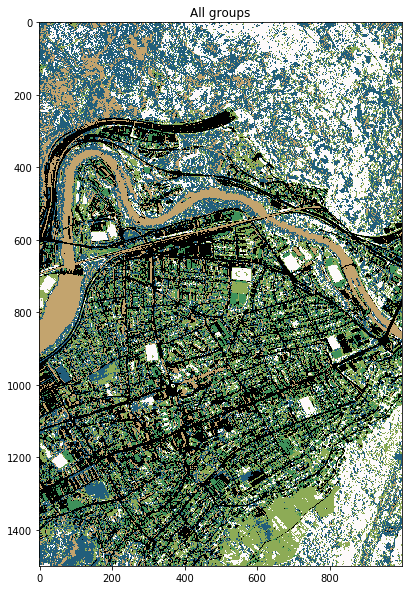

In [12]:
show_results(mbkmeans6)

### MiniBatchKMeans for n_clusters=9

In [7]:
%%time
mbkmeans9 = MiniBatchKMeans(n_clusters=9)
mbkmeans9.fit(X)

CPU times: user 7.54 s, sys: 537 ms, total: 8.08 s
Wall time: 7.98 s


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=9, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

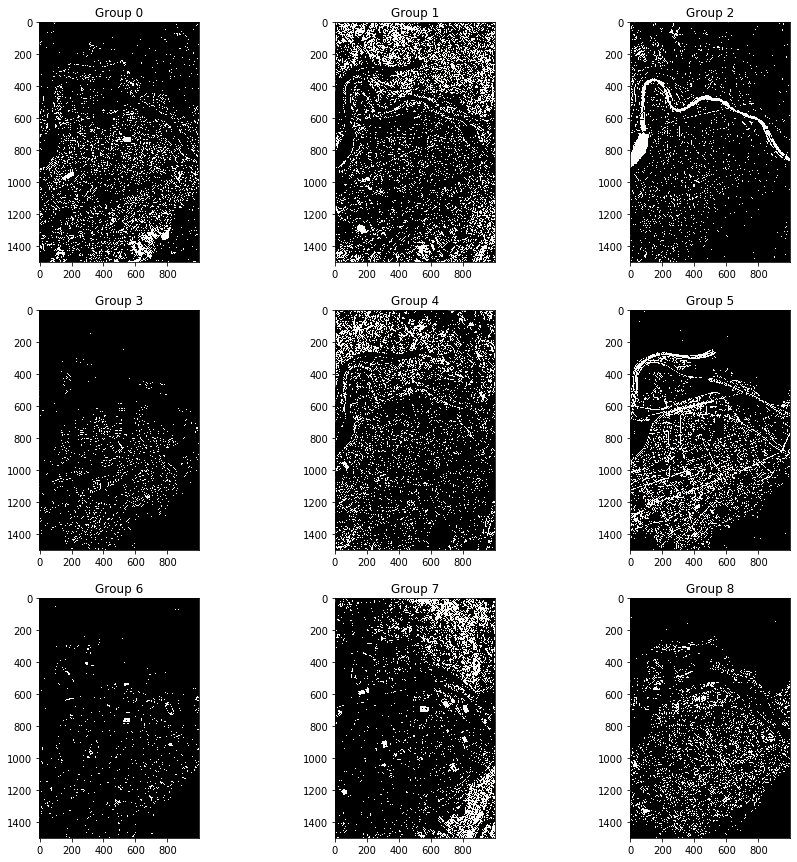

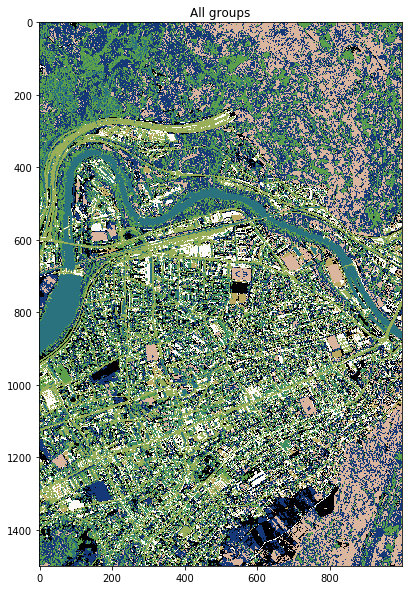

In [8]:
show_results(mbkmeans9)

### KMeans for n_clusters = 6

In [7]:
%%time
kmeans6 = KMeans(n_clusters=6)
kmeans6.fit(X)

CPU times: user 6min 25s, sys: 51.3 s, total: 7min 17s
Wall time: 6min 42s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

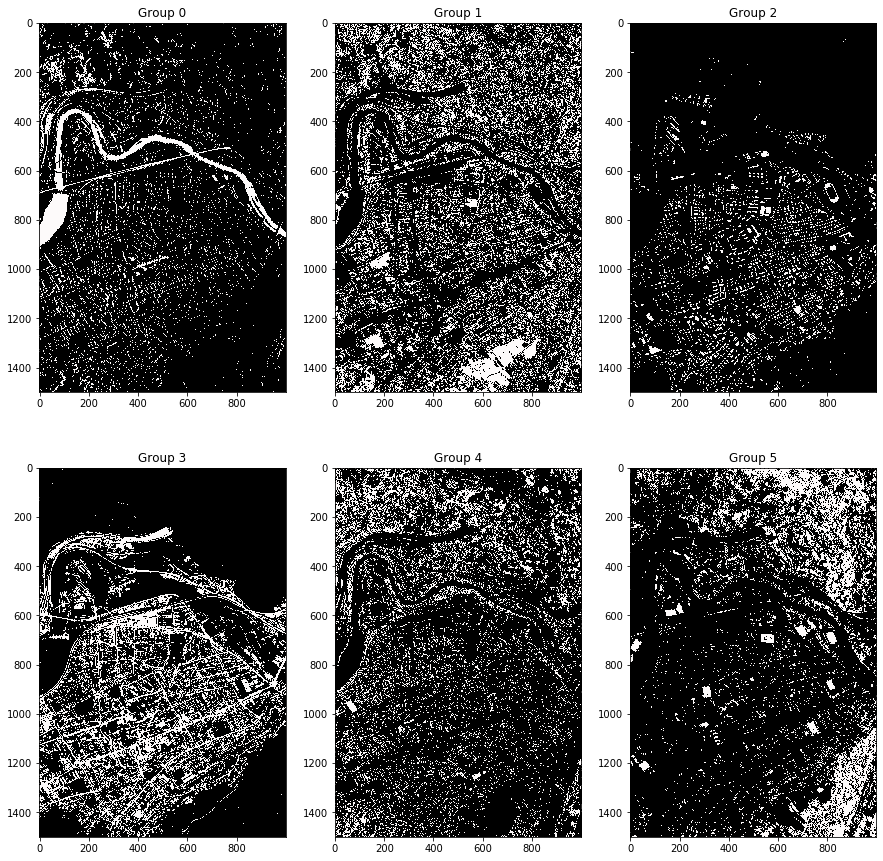

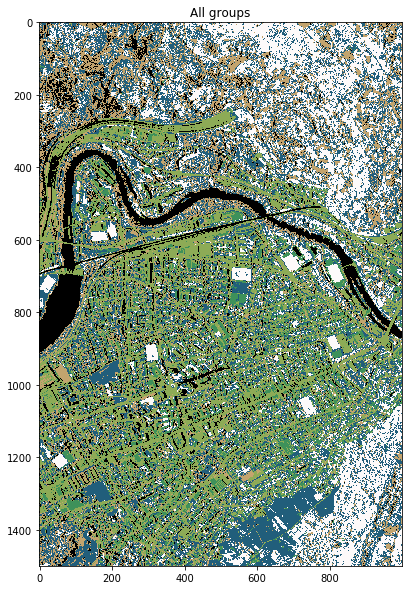

In [8]:
show_results(kmeans6)